# 2. Linear Regression from Scratch

In [36]:
import time
import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch

## Generate Data

我们使用线性模型参数$\mathbf{w} = [2, -3.4]^\top$、$b = 4.2$
和噪声项$\epsilon$生成数据集及其标签：

Let's generate some **2-dimensional** data points $X$ and thier **labels** $y$ with $\mathbf{w} = [2, -3.4]^\top$ and $b = 4.2$:

$$\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon$$

In [37]:
def synthetic_data(w, b, num_examples):
    '''
    Function to synthesize linearly related input data X and labels y.
    X with shape num_examples × len(w).
    y with shape num_examples × 1.
    Errors are normally distributed with N(0, 0.01).
    '''
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape(-1, 1)

In [38]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2

num_examples = 1000
features, labels = synthetic_data(true_w, true_b, num_examples)

features[:5], labels[:5]

(tensor([[-3.1647, -0.5696],
         [-0.6255,  2.1420],
         [-1.4294, -1.4198],
         [ 0.3130, -0.7213],
         [ 0.1474, -0.3109]]),
 tensor([[-0.1872],
         [-4.3404],
         [ 6.1753],
         [ 7.2651],
         [ 5.5473]]))

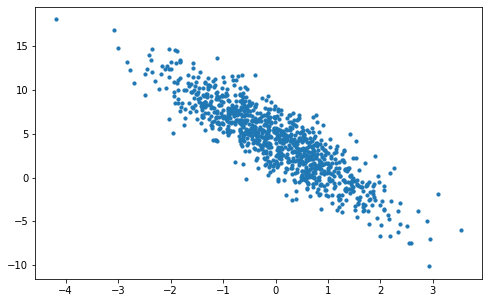

In [39]:
plt.figure(figsize=(8,5))
plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 10)
plt.show()

## Data Iterator

We need to define a function that can generate random **mini batches** of training data.

In [40]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [48]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.5137, -1.5325],
        [-2.6743,  0.3951],
        [ 2.2795,  2.2591],
        [-1.3431, -1.2010],
        [ 1.0821, -0.5437],
        [-1.0654,  0.2912],
        [ 0.0941,  0.6588],
        [-1.7620,  0.6029],
        [ 1.1932, -0.4877],
        [-0.3215, -0.7656]]) 
 tensor([[10.4215],
        [-2.4859],
        [ 1.1010],
        [ 5.6150],
        [ 8.2114],
        [ 1.0581],
        [ 2.1398],
        [-1.3639],
        [ 8.2442],
        [ 6.1690]])


## Initialize Parameters

The **weights** must be initialized randomly so that the update will not be always the same in gradient descent. The **bias** can be initialized as zeros.

In [66]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

## Linear Model

In [50]:
def linreg(X, w, b):  
    return torch.matmul(X, w) + b

## Loss Function

In [51]:
def squared_loss(y_hat, y):  
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## Optimizer

In [52]:
def sgd(params, lr, batch_size):
    '''
    A stochastic gradient descent optimizer.
    '''
    with torch.no_grad():          #only update the values without computing the gradients
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

## Training 

In [67]:
lr = 0.03
num_epochs = 3
batch_size = 15
net = linreg
loss = squared_loss

In [68]:
for epoch in range(num_epochs):         #we repeated train the model over the training set multiple times
    for X, y in data_iter(batch_size, features, labels):
        y_pred = net(X, w, b)
        l = loss(y_pred, y)
        l.sum().backward()               #we need to sum the individual loss to obtain the cost function
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        y_pred = net(features, w, b)
        train_l = loss(y_pred, labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.239507
epoch 2, loss 0.003410
epoch 3, loss 0.000097


In [69]:
w, b

(tensor([[ 1.9981],
         [-3.3952]], requires_grad=True),
 tensor([4.1924], requires_grad=True))